### PT Symmetric Bilayer Kagome Models 


In [1]:
using StaticArrays
using LinearAlgebra
using Makie
using CairoMakie
using Colors 


In [52]:
# Here, we define the three vectors connecting nearest neighbor Kagome atoms 

# Useful C_3 rotation
global const C_3::Matrix{Float64} = [cos(2.0*pi/3.0) -sin(2.0*pi/3.0); sin(2.0*pi/3.0) cos(2.0*pi/3.0)]

# Useful C_6 rotation
global const C_6::Matrix{Float64} = [cos(pi/3.0) -sin(pi/3.0); sin(pi/3.0) cos(pi/3.0)]



global const σx  = @SArray ComplexF64[0.0 1.0; 1.0 0.0]
global const σy  = @SArray ComplexF64[0.0 -im; im 0.0]
global const σz  = @SArray ComplexF64[1.0 0.0; 0.0 -1.0];
global const σ0  = @SArray ComplexF64[1.0 0.0; 0.0 1.0];

global const ρx  = @SArray ComplexF64[0.0 1.0; 1.0 0.0]
global const ρy  = @SArray ComplexF64[0.0 -im; im 0.0]
global const ρz  = @SArray ComplexF64[1.0 0.0; 0.0 -1.0];
global const ρ0  = @SArray ComplexF64[1.0 0.0; 0.0 1.0];



global const σ_up  = @SArray ComplexF64[1.0 0.0; 0.0 0.0];
global const σ_dn  = @SArray ComplexF64[0.0 0.0; 0.0 1.0];


global const TR1::SMatrix{3, 3, ComplexF64, 9} = @SMatrix [0.0 1.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0]
global const TR2::SMatrix{3, 3, ComplexF64, 9} = @SMatrix [0.0 0.0 1.0; 0.0 0.0 0.0; 0.0 0.0 0.0]
global const TR3::SMatrix{3, 3, ComplexF64, 9} = @SMatrix [0.0 0.0 0.0; 0.0 0.0 1.0; 0.0 0.0 0.0]

global const TI1::SMatrix{3, 3, ComplexF64, 9} = @SMatrix [0.0 im 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0]
global const TI2::SMatrix{3, 3, ComplexF64, 9} = @SMatrix [0.0 0.0 -im; 0.0 0.0 0.0; 0.0 0.0 0.0]
global const TI3::SMatrix{3, 3, ComplexF64, 9} = @SMatrix [0.0 0.0 0.0; 0.0 0.0 im; 0.0 0.0 0.0]


global const λ0::SMatrix{3, 3, ComplexF64, 9} = @SMatrix [1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0]


global const A1::Vector{Float64} = [1.0, 0.0]
global const A2::Vector{Float64} = [-0.5, sqrt(3)/2]

global const A::SMatrix{2, 2, Float64, 4} = @SMatrix [A1[1] A1[2]; A2[1] A2[2]]
global const G::SMatrix{2, 2, Float64, 4} = 2.0 * π * inv(A)'
global const G1::SVector{2, Float64} = G[1, :]
global const G2::SVector{2, Float64} = G[2, :]

global const d1::Vector{Float64} = [0.0, 1.0, 0.0]
global const d2::Vector{Float64} = [-0.8660254037844386, -0.5, 0.0]
global const d3::Vector{Float64} = [-0.8660254037844386, -0.5, 0.0]

@inline function cartesian_to_reduced(k_cart::Vector{Float64}, G)
    inv(G)' * k_cart
end


cartesian_to_reduced (generic function with 1 method)

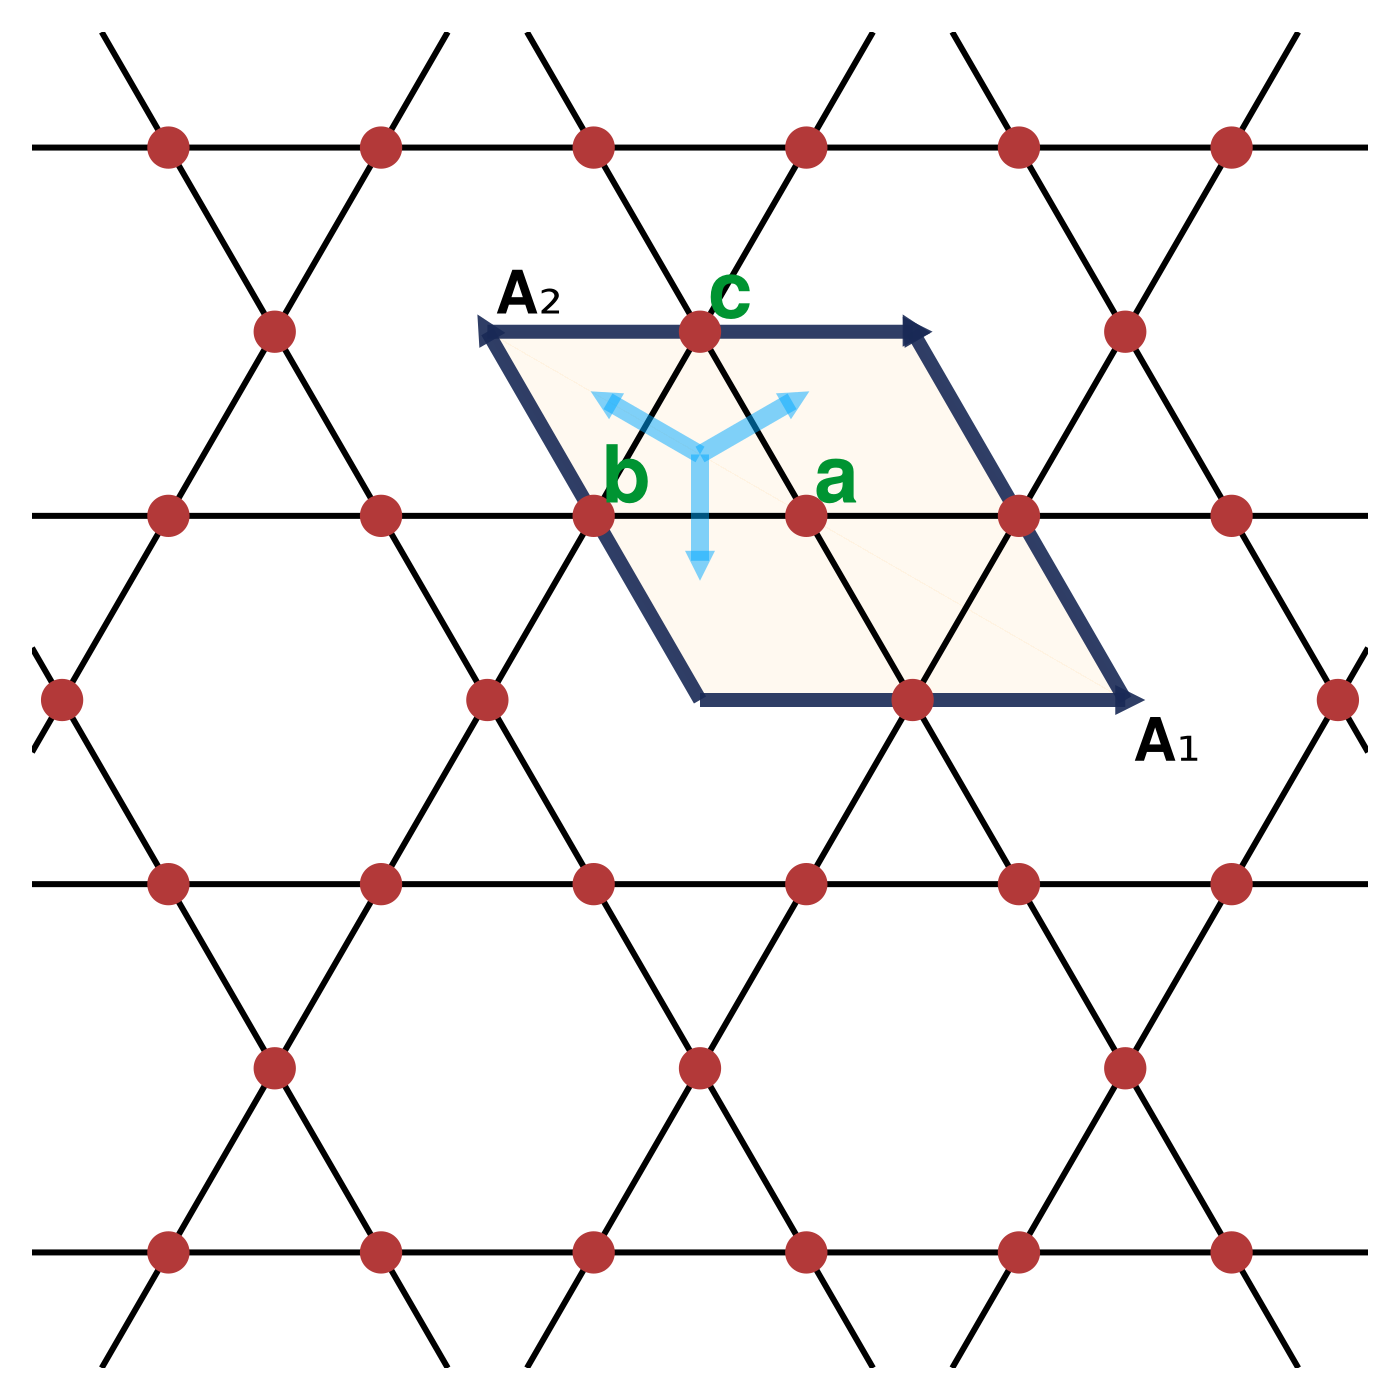

In [50]:
### Now, let us plot the Kagome Lattice  ! 
let 
    # First, compute the atom positions 
    a = 0.5 * (A1 + A2)
    b = 0.5 * A1 
    c = 0.5 * A2 

    box_ln::Float64 = π / 2

    Λ::Int = 4
    a_points = Vector{Vector{Float64}}(undef, (2 * Λ + 1)^2)
    b_points = Vector{Vector{Float64}}(undef, (2 * Λ + 1)^2)
    c_points = Vector{Vector{Float64}}(undef, (2 * Λ + 1)^2)
    counter::Int = 1
    for n ∈ -Λ:Λ
        for m ∈ -Λ:Λ
            a_points[counter] = a + n * A1 + m * A2
            counter += 1 
        end
    end
    counter = 1 
    for n ∈ -Λ:Λ
        for m ∈ -Λ:Λ
            b_points[counter] = b + n * A1 + m * A2
            counter += 1 
        end
    end
    counter = 1
    for n ∈ -Λ:Λ
        for m ∈ -Λ:Λ
            c_points[counter] = c + n * A1 + m * A2
            counter += 1 
        end
    end

    # Distance between the atoms 
    Distance::Float64 = norm(a - b)

    NNPairs_AB = Tuple{Vector{Float64}, Vector{Float64}}[]
    for a ∈ a_points
        for b ∈ b_points
            d = norm(a - b) 
            if (abs(d - Distance) < 1e-6)
                push!(NNPairs_AB, (a, b))
            end
        end
    end

    NNPairs_AC = Tuple{Vector{Float64}, Vector{Float64}}[]
    for a ∈ a_points
        for c ∈ c_points
            d = norm(a - c) 
            if (abs(d - Distance) < 1e-6)
                push!(NNPairs_AC, (a, c))
            end
        end
    end

    NNPairs_BC = Tuple{Vector{Float64}, Vector{Float64}}[]
    for b ∈ b_points
        for c ∈ c_points
            d = norm(b - c) 
            if (abs(d - Distance) < 1e-6)
                push!(NNPairs_BC, (b, c))
            end
        end
    end


    f = Figure(size = (700, 700), backgroundcolor = RGBf(1, 1, 1)) 
    ax = Axis(f[1, 1], aspect = 1, spinewidth = 4.5, limits = (-box_ln, box_ln, -box_ln, box_ln))

    # Parallelogram 
    vertices = Point2f[(0,0), (A1[1], A1[2]), (A2[1], A2[2]), (A1[1] + A2[1], A1[2] + A2[2])]

    ParallelogramColor = "#F79F1F" # Pico void color 
    ParallelogramColor = parse(Colorant, ParallelogramColor) 
    Alpha = 0.07
    ParallelogramColor = RGBA(ParallelogramColor.r, ParallelogramColor.g, ParallelogramColor.b, Alpha)
    
    mesh!(ax, vertices, [1 2 3; 2 4 3], color = ParallelogramColor)

    # Basis 
    BasisColor = "#192a56" # Pico void color 
    BasisColorIn = parse(Colorant, BasisColor) 
    Alpha = 0.9
    BasisColorIn = RGBA(BasisColorIn.r, BasisColorIn.g, BasisColorIn.b, Alpha)
    Start_xs = [0.0, 0.0, A2[1], A1[1]]
    Start_ys = [0.0, 0.0, A2[2], A1[2]]
    Arrows_xs = [A1[1], A2[1], A1[1], A2[1]]
    Arrows_ys = [A1[2], A2[2], A1[2], A2[2]]
    arrows!(ax, Start_xs, Start_ys, Arrows_xs, Arrows_ys, linewidth = 7, 
            color = BasisColorIn, arrowsize = 20.6)

    
    # Lattice Edges 
    for (a, b) ∈ NNPairs_AB
        lines!(ax, [a[1], b[1]], [a[2], b[2]], color = :black, linewidth = 3)
    end
    for (a, c) ∈ NNPairs_AC
        lines!(ax, [a[1], c[1]], [a[2], c[2]], color = :black, linewidth = 3)
    end
    for (b, c) ∈ NNPairs_BC
        lines!(ax, [b[1], c[1]], [b[2], c[2]], color = :black, linewidth = 3)
    end
    # Plot the A, B, and C sites 
    AtomSize = 30
    AtomColor = "#b33939"
    for a ∈ a_points
        scatter!(ax, a[1], a[2], markersize = AtomSize, color = AtomColor)
    end
    for b ∈ b_points
        scatter!(ax, b[1], b[2], markersize = AtomSize, color = AtomColor)
    end
    for c ∈ c_points
        scatter!(ax, c[1], c[2], markersize = AtomSize, color = AtomColor)
    end
    
    text!(
        ax, A1[1], A1[2],
        text = "A₁",
        font = :bold,
        align = (:left, :top),
        offset = (4, -2),
        #space = :relative,
        fontsize = 30
    )
    text!(
        ax, A2[1], A2[2],
        text = "A₂",
        font = :bold,
        align = (:left, :bottom),
        offset = (4, 2),
        #space = :relative,
        fontsize = 30
    )

    # A, B, C Sites 
    text!(
        ax, a[1], a[2],
        text = "a",
        font = :bold,
        align = (:left, :bottom),
        offset = (4, -2),
        #space = :relative,
        fontsize = 40,
        color = "#009432"
    )

    text!(
        ax, b[1] + A2[1], b[2] + A2[2],
        text = "c",
        font = :bold,
        align = (:left, :bottom),
        offset = (4, -2),
        #space = :relative,
        fontsize = 40,
        color = "#009432"
    )

    text!(
        ax, c[1], c[2],
        text = "b",
        font = :bold,
        align = (:left, :bottom),
        offset = (4, -2),
        #space = :relative,
        fontsize = 40,
        color = "#009432"
    )

    nac = [sqrt(3) / 2.0, 0.5]
    ncb = [-sqrt(3) / 2.0, 0.5]
    nab = [0.0, -1.0]
    scale = 4

    RashbaArrowColor = "#00a8ff" # Pico void color 
    RashbaArrowColor = parse(Colorant, RashbaArrowColor) 
    Alpha = 0.5
    RashbaArrowColor = RGBA(RashbaArrowColor.r, RashbaArrowColor.g, RashbaArrowColor.b, Alpha)

    centroid = (a + c + b + A2) / 3.0  
    # Rashba "flux "
    Rashba_X₋ = [centroid[1], centroid[1], centroid[1]] 
    Rashba_Y₋ = [centroid[2], centroid[2], centroid[2]]
    Rashba_X₊ = [nab[1], ncb[1], nac[1]] ./ scale 
    Rashba_Y₊ = [nab[2], ncb[2], nac[2]] ./ scale
    arrows!(ax, Rashba_X₋, Rashba_Y₋, Rashba_X₊, Rashba_Y₊, linewidth = 9, 
            color = RashbaArrowColor, arrowsize = 20.6)




    hidexdecorations!(ax)
    hideydecorations!(ax)
    hidespines!(ax)
    f
end

### First, we construct a monolayer model that preserves $\mathcal{P}\mathcal{T}$ Symmetry, and breaks $C_3$ symmetry. The PT symmetry is trivial here, since both $\mathcal{P}$ and $\mathcal{T}$ are symmetries of the model. 

In [4]:
# This is a three-parameter family of models. In this model, the parameter space is the two-sphere times a line 
# I think this corresponds to in-plane magnetism 
@inline function Hamiltoniank_1(k::Vector{Float64}, λ::Float64, θ::Float64, ϕ::Float64)
    k1::Float64 = k[1]; k2::Float64 = k[2]
    k3::Float64 = -k1 - k2 
    -2.0 * λ * kron(sin(θ) * cos(ϕ) * σx + sin(θ) * sin(ϕ) * σy + cos(θ) * σz, cos(π * k1) * TI1 + cos(π * k2) * TI2 + cos(π * k3) * TI3) +
        (-2.0) * kron(σ0, cos(π * k1) * TR1 + cos(π * k2) * TR2 + cos(π * k3) * TR3) 
end

Hamiltoniank_1 (generic function with 1 method)

In [68]:
@inline function EvalsHamiltoniank_1(k::SVector{2, Float64}, λ::Float64, θ::Float64, ϕ::Float64, B::Float64)
    k1::Float64 = k[1]; k2::Float64 = k[2]
    k3::Float64 = -k1 - k2 
    H::SMatrix{6, 6, ComplexF64, 36} =  -2.0 * λ * kron(sin(θ) * cos(ϕ) * σx + sin(θ) * sin(ϕ) * σy + cos(θ) * σz, cos(π * k1) * TI1 + cos(π * k2) * TI2 + cos(π * k3) * TI3) +
        (-2.0) * kron(σ0, cos(π * k1) * TR1 + cos(π * k2) * TR2 + cos(π * k3) * TR3) +
        B * kron(σx, λ0) 
    return eigvals(Hermitian(H + H'))
end


@inline function EvalsHamiltoniankRashba_1(k::SVector{2, Float64}, λ::Float64, u1::Float64, u2::Float64, u3::Float64)
    k1::Float64 = k[1]; k2::Float64 = k[2]
    k3::Float64 = -k1 - k2 
    H::SMatrix{6, 6, ComplexF64, 36} =  -2.0 * λ * (u1 * kron(σy, cos(π * k1) * TI1) - u2 * kron(0.8660254037844386 * σx + 0.5 * σy, cos(π * k2) * TI2) + u3 * kron(0.8660254037844386 * σx - 0.5 * σy, cos(π * k3) * TI3)) + 
        (-2.0) * kron(σ0, cos(π * k1) * TR1 + cos(π * k2) * TR2 + cos(π * k3) * TR3)
    return eigvals(Hermitian(H + H'))
end


@inline function EvalsHamiltoniankRashba_1(k::Vector{Float64}, λ::Float64, u1::Float64, u2::Float64, u3::Float64)
    k1::Float64 = k[1]; k2::Float64 = k[2]
    k3::Float64 = -k1 - k2 
    H::SMatrix{6, 6, ComplexF64, 36} =  -2.0 * λ * (u1 * kron(σy, cos(π * k1) * TI1) - u2 * kron(0.8660254037844386 * σx + 0.5 * σy, cos(π * k2) * TI2) + u3 * kron(0.8660254037844386 * σx - 0.5 * σy, cos(π * k3) * TI3)) + 
        (-2.0) * kron(σ0, cos(π * k1) * TR1 + cos(π * k2) * TR2 + cos(π * k3) * TR3)
    return eigvals(Hermitian(H + H'))
end



@inline function EvalsHamiltoniankRashba_2(k::SVector{2, Float64}, λI::Float64, λR::Float64, θ::Float64, ϕ::Float64, 
    d1::Vector{Float64} = d1, d2::Vector{Float64} = d2, d3::Vector{Float64} = d3)

    ck1::Float64 = cos(π * k[1]); ck2::Float64 = cos(π * k[2])
    ck3::Float64 = cos(π * (-k[1] - k[2])) 

    # Magnetization Direction 
    m = [sin(θ) * cos(ϕ), sin(θ) * sin(ϕ), cos(θ)]
    m1 = dot(m, d1); m2 = dot(m, d2); m3 = dot(m, d3)
    σ1 = σy; σ2 = d2[1] * σx + d2[2] * σy; σ3 = d3[1] * σx + d3[2] * σy 

    H::SMatrix{6, 6, ComplexF64, 36} =  -2.0 * λR * (m1 * kron(σ1, ck1 * TI1) + m2 * kron(σ2, ck2 * TI2) + m3 * kron(σ3, ck3 * TI3)) +
                                (-2.0 * λI) * m[3] * kron(σz, ck1 * TI1 + ck2 * TI2 + ck3 * TI3) +  
                                (-2.0) * kron(σ0, ck1 * TR1 + ck2 * TR2 + ck3 * TR3)
    return eigvals(Hermitian(H + H'))
end

@inline function EvalsHamiltoniankRashba_2(k::Vector{Float64}, λI::Float64, λR::Float64, θ::Float64, ϕ::Float64, 
    d1::Vector{Float64} = d1, d2::Vector{Float64} = d2, d3::Vector{Float64} = d3)

    ck1::Float64 = cos(π * k[1]); ck2::Float64 = cos(π * k[2])
    ck3::Float64 = cos(π * (-k[1] - k[2])) 

    # Magnetization Direction 
    m = [sin(θ) * cos(ϕ), sin(θ) * sin(ϕ), cos(θ)]
    m1 = dot(m, d1); m2 = dot(m, d2); m3 = dot(m, d3)
    σ1 = σy; σ2 = d2[1] * σx + d2[2] * σy; σ3 = d3[1] * σx + d3[2] * σy 

    H::SMatrix{6, 6, ComplexF64, 36} =  -2.0 * λR * (m1 * kron(σ1, ck1 * TI1) + m2 * kron(σ2, ck2 * TI2) + m3 * kron(σ3, ck3 * TI3)) +
                                (-2.0 * λI) * m[3] * kron(σz, ck1 * TI1 + ck2 * TI2 + ck3 * TI3) +  
                                (-2.0) * kron(σ0, ck1 * TR1 + ck2 * TR2 + ck3 * TR3)
    return eigvals(Hermitian(H + H'))
end




EvalsHamiltoniankRashba_2 (generic function with 8 methods)

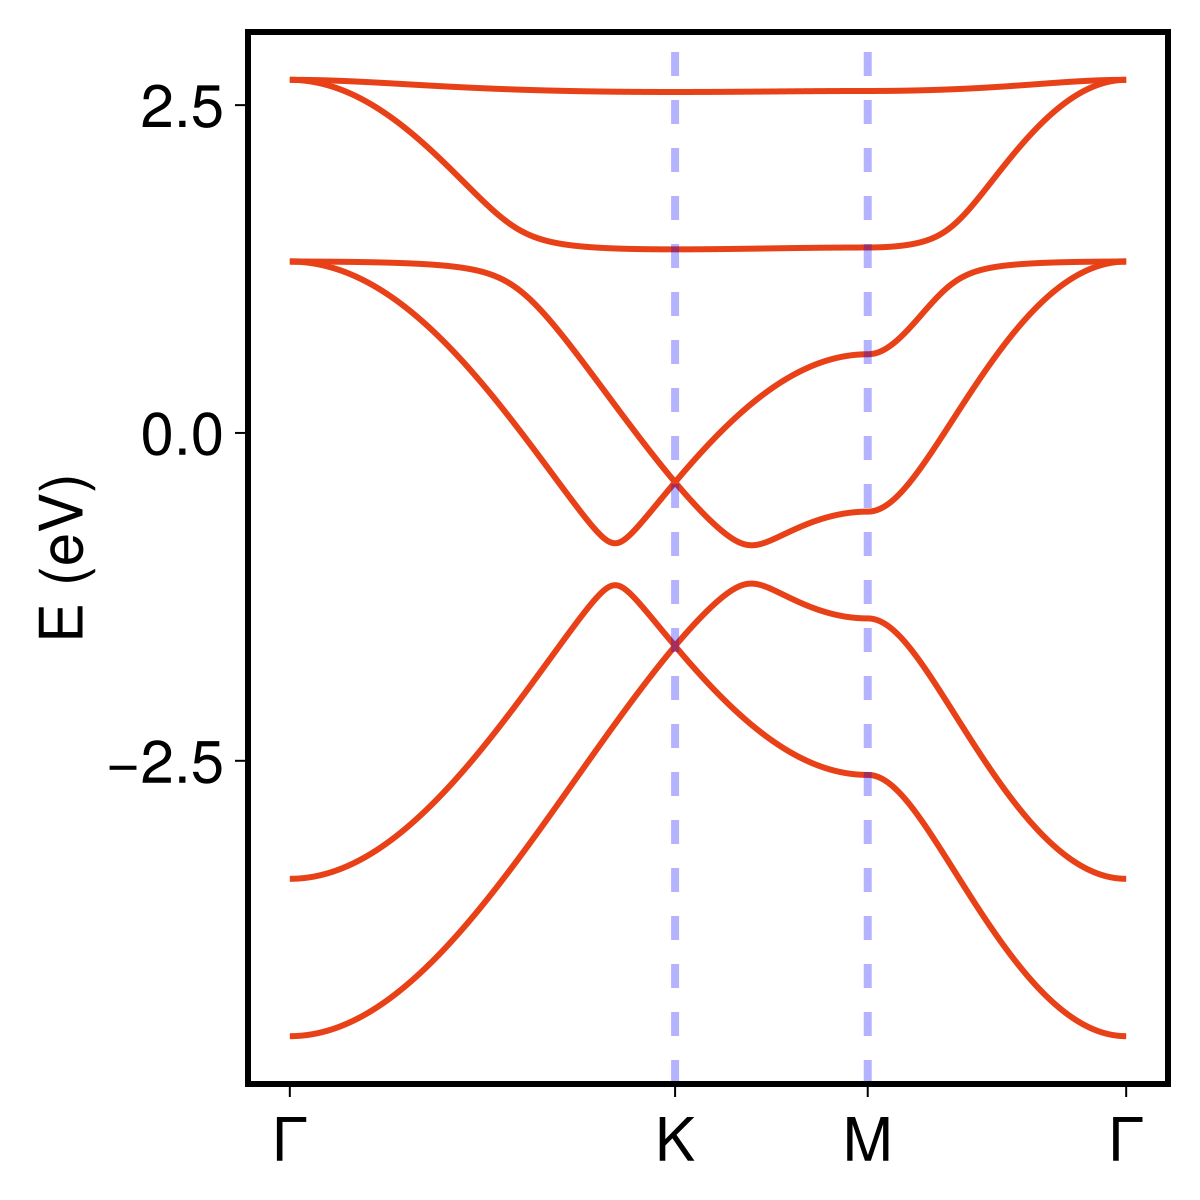

In [54]:
### Plot the Band Structure 
### Now, generate the K-Path 
global const Γ::Vector{Float64} = [0.0, 0.0]
global const K::Vector{Float64} = [0.666666666667, -0.3333333]
global const K′::Vector{Float64} = [0.33333333, 0.33333333333333]
global const M::Vector{Float64} = (K + K′) / 2.0 
# Now, construct the K-path 
let nps = 200, λ = 0.1, θ = 0.0, ϕ = 0.0, B = 0.3
    ΓK = collect(LinRange(Γ, K, nps)); pop!(ΓK) 
    KM = collect(LinRange(K, M, nps)); pop!(KM)
    MΓ = collect(LinRange(M, Γ, nps))
    ΓKMΓ = [ΓK; KM; MΓ]; nk = length(ΓKMΓ) 
    # Diagonalize 
    Evals = EvalsHamiltoniank_1.(ΓKMΓ, Ref(λ), Ref(θ), Ref(ϕ), Ref(B))
    
    # xs 
    xs = Vector{Float64}(undef, nk)
    xs[1] = 0.0 
    ϵ::Float64 = 0.0 
    for ik ∈ 2 : nk
        ϵ += norm(ΓKMΓ[ik, :] - ΓKMΓ[ik - 1, :])
        xs[ik] = ϵ
    end
    Kpos     = norm(K); Mpos = norm(K) + norm(M - K);
    tick_pos = [0.0, Kpos, Mpos, xs[end]]
    tick_labels = ["Γ", "K", "M", "Γ"]

    f = Figure(size = (600, 600))
    FontSize = 30 
    ax = Axis(f[1, 1], ylabel = "E (eV)", 
        yticklabelsize = FontSize, xticklabelsize = FontSize, 
        ylabelsize = FontSize, xlabelsize = FontSize,
        spinewidth = 3) 

    ax.xticks = (tick_pos, tick_labels)

    Color = "#e84118"

    for i ∈ 1 : 6
        eks = [e[i] for e ∈ Evals]
        lines!(ax, xs, eks, color = Color, linewidth = 3)
    end



    hideydecorations!(ax, grid = true, label = false, ticks = false, ticklabels = false)
    hidexdecorations!(ax, grid = true, ticks = false, ticklabels = false)
    vlines!(ax, [Kpos, Mpos], color = (0, 0, 1, 0.3), linewidth = 4, linestyle = :dash)

    f
    

end

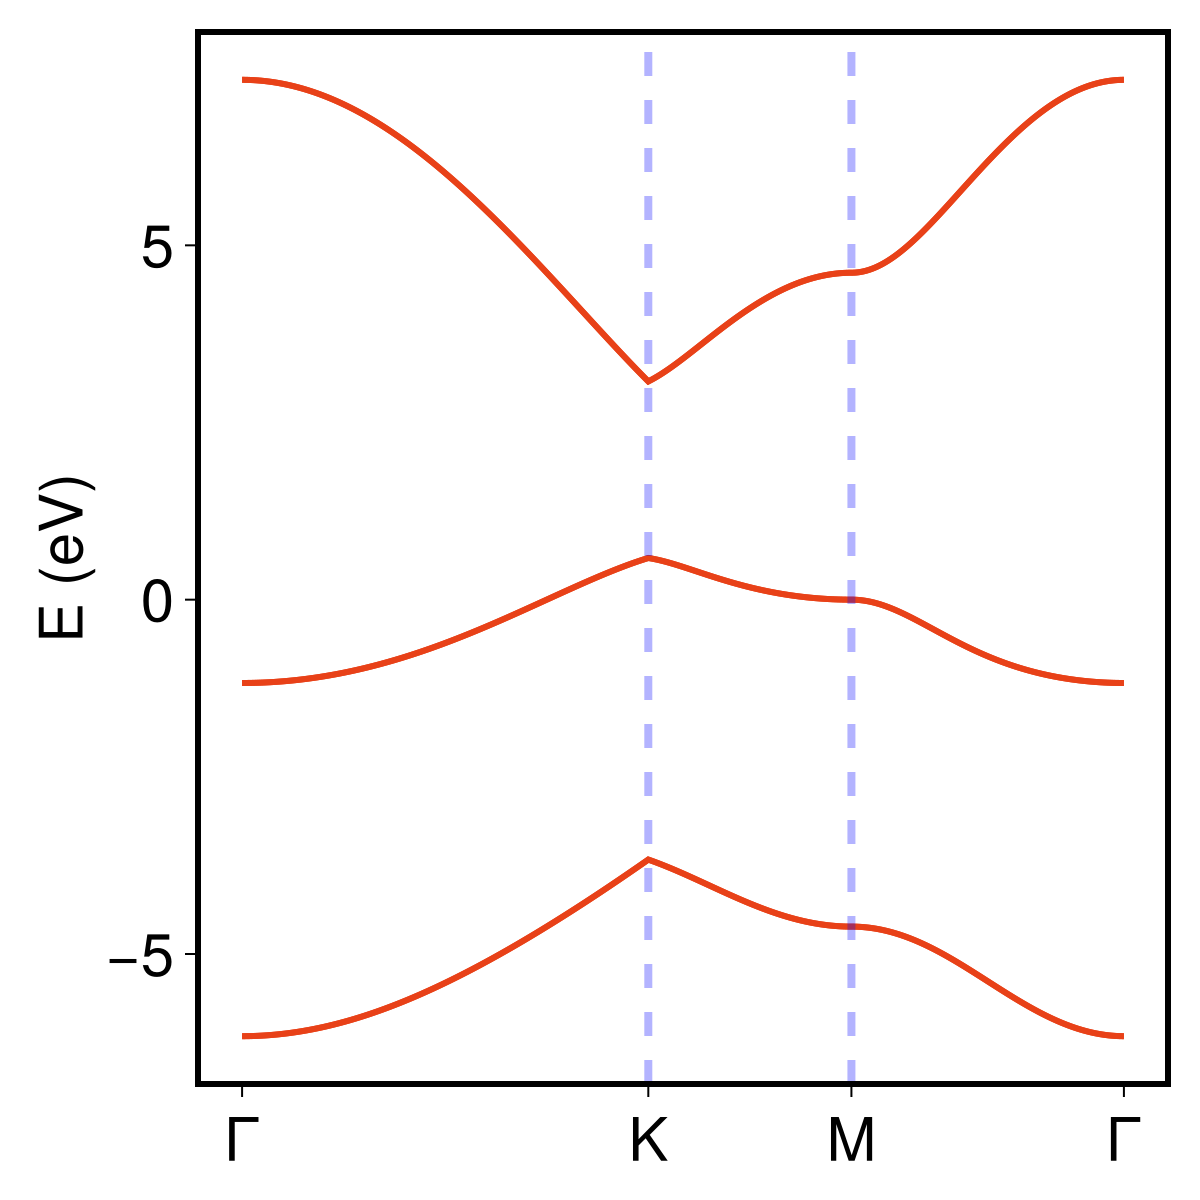

In [72]:
### Plot the Band Structure 

let nps = 200, λI = 0.0, λR = 2.4, θ = π / 2, ϕ = 0.0
    ΓK = collect(LinRange(Γ, K, nps)); pop!(ΓK) 
    KM = collect(LinRange(K, M, nps)); pop!(KM)
    MΓ = collect(LinRange(M, Γ, nps))
    ΓKMΓ = [ΓK; KM; MΓ]; nk = length(ΓKMΓ) 
    # Diagonalize 
    Evals = EvalsHamiltoniankRashba_2.(ΓKMΓ, Ref(λI), Ref(λR), Ref(θ), Ref(ϕ))
    
    # xs 
    xs = Vector{Float64}(undef, nk)
    xs[1] = 0.0 
    ϵ::Float64 = 0.0 
    for ik ∈ 2 : nk
        ϵ += norm(ΓKMΓ[ik, :] - ΓKMΓ[ik - 1, :])
        xs[ik] = ϵ
    end
    Kpos     = norm(K); Mpos = norm(K) + norm(M - K);
    tick_pos = [0.0, Kpos, Mpos, xs[end]]
    tick_labels = ["Γ", "K", "M", "Γ"]

    f = Figure(size = (600, 600))
    FontSize = 30 
    ax = Axis(f[1, 1], ylabel = "E (eV)", 
        yticklabelsize = FontSize, xticklabelsize = FontSize, 
        ylabelsize = FontSize, xlabelsize = FontSize,
        spinewidth = 3) 

    ax.xticks = (tick_pos, tick_labels)

    Color = "#e84118"

    for i ∈ 1 : 6
        eks = [e[i] for e ∈ Evals]
        lines!(ax, xs, eks, color = Color, linewidth = 3)
    end



    hideydecorations!(ax, grid = true, label = false, ticks = false, ticklabels = false)
    hidexdecorations!(ax, grid = true, ticks = false, ticklabels = false)
    vlines!(ax, [Kpos, Mpos], color = (0, 0, 1, 0.3), linewidth = 4, linestyle = :dash)

    f
    

end

Now, we construct contour plots to see if the $C_3$ symmetry is broken 

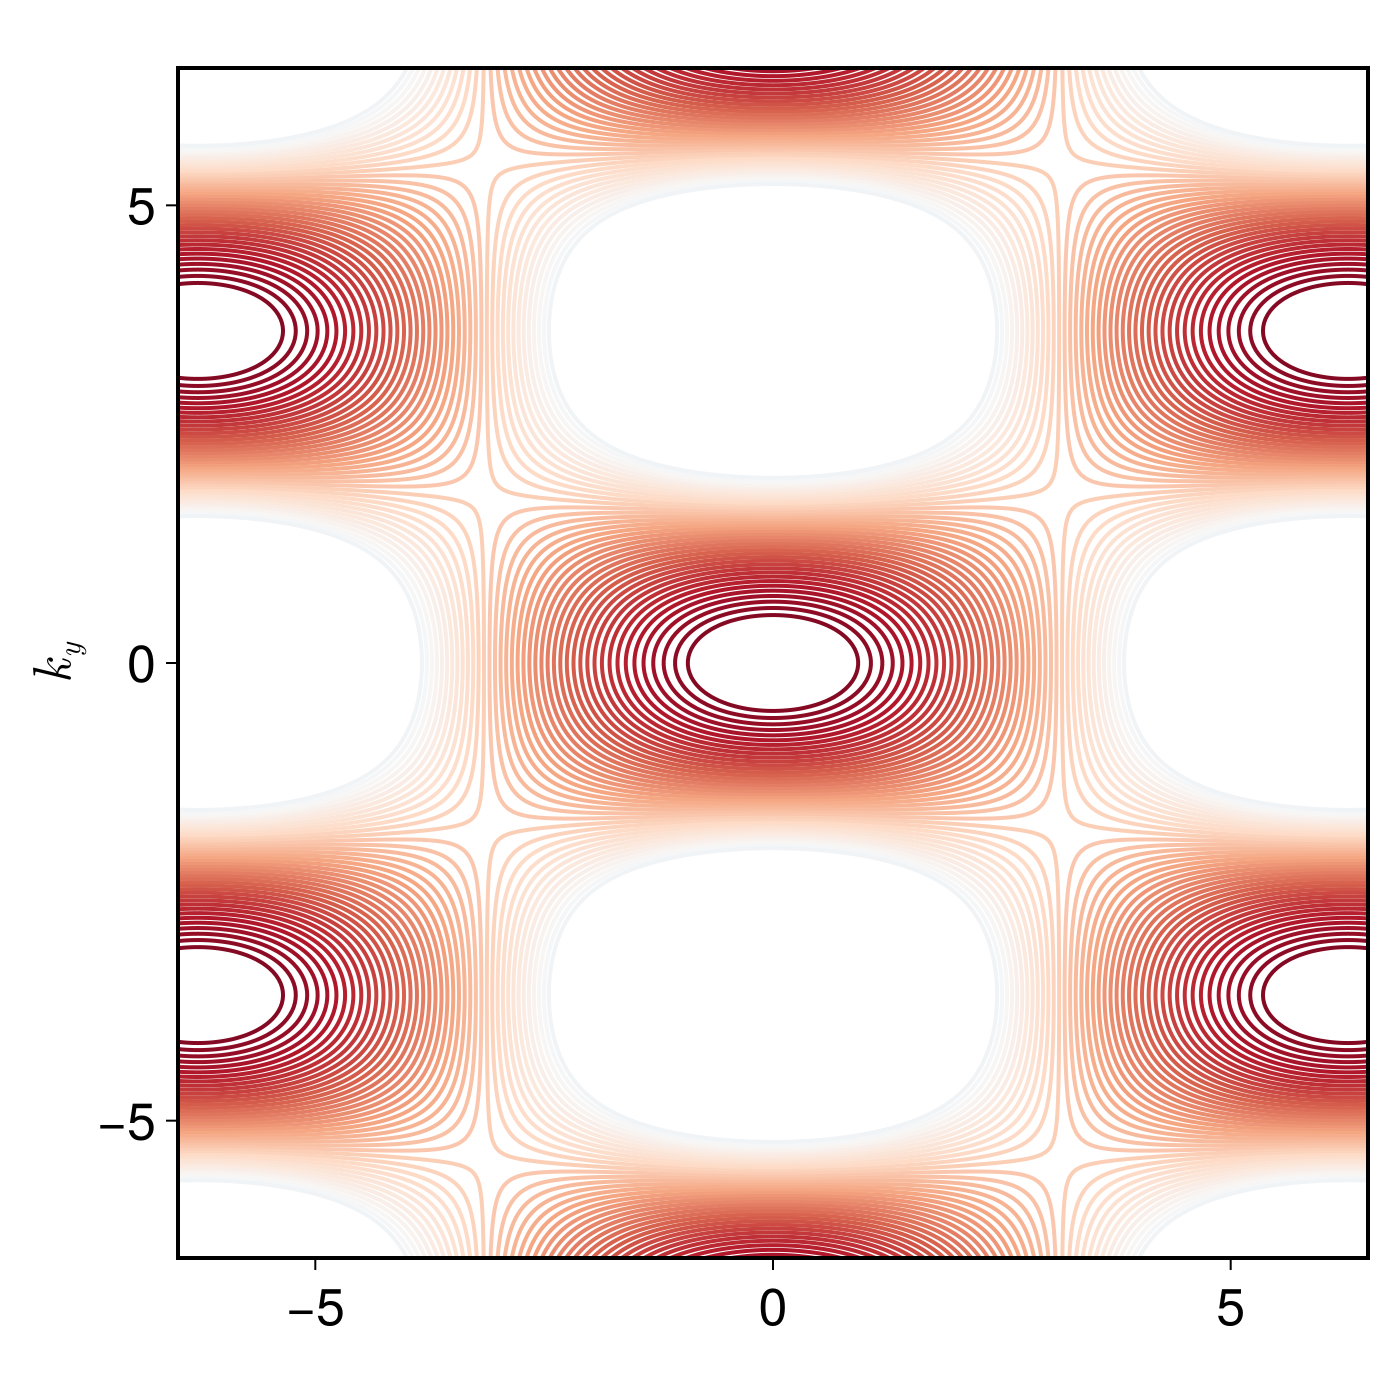

In [73]:
let λI = 0.0, λR = 2.4, θ = π / 2, ϕ = 0.0
    band::Int64 = 1
    kmin::Float64 = -6.5
    kmax::Float64 = 6.5 
    nps::Int64   = 300
    min::Float64 = -6.0 
    max::Float64 = -4.0 
    

    kxs = LinRange(kmin, kmax, nps)
    kys = LinRange(kmin, kmax, nps)

    ks = Matrix{Vector{Float64}}(undef, nps, nps)
    for i ∈ 1 : nps
        for j ∈ 1 : nps
            ks[i, j] = [kxs[i], kys[j]]
        end
    end

    ks = cartesian_to_reduced.(ks, Ref(G))

    eks = EvalsHamiltoniankRashba_2.(ks, Ref(λI), Ref(λR), Ref(θ), Ref(ϕ))
    eks = [eks[i, j][band] for i ∈ 1:nps, j ∈ 1:nps]
    

    f = Figure(size = (700, 700))
    ax = Axis(f[1, 1],
        aspect = 1.0,
        ylabel = L"$k_y$",
        xlabel = L"$k_x$",
        yticklabelsize = 26.0,
        xticklabelsize = 26.0,
        ylabelsize = 26,
        xlabelsize = 26,
        spinewidth = 2,
        limits = (kxs[1], kxs[end], kys[1], kys[end]),
    )

    contour!(ax, kxs, kys, eks, levels = min:0.05:max, colormap = :RdBu, linewidth = 2)
    hideydecorations!(ax, grid = true, label = false, ticks = false, ticklabels = false)
    hidexdecorations!(ax, grid = true, ticks = false, ticklabels = false)
    #save("contours_phi_pi6.png", f)
    f
end


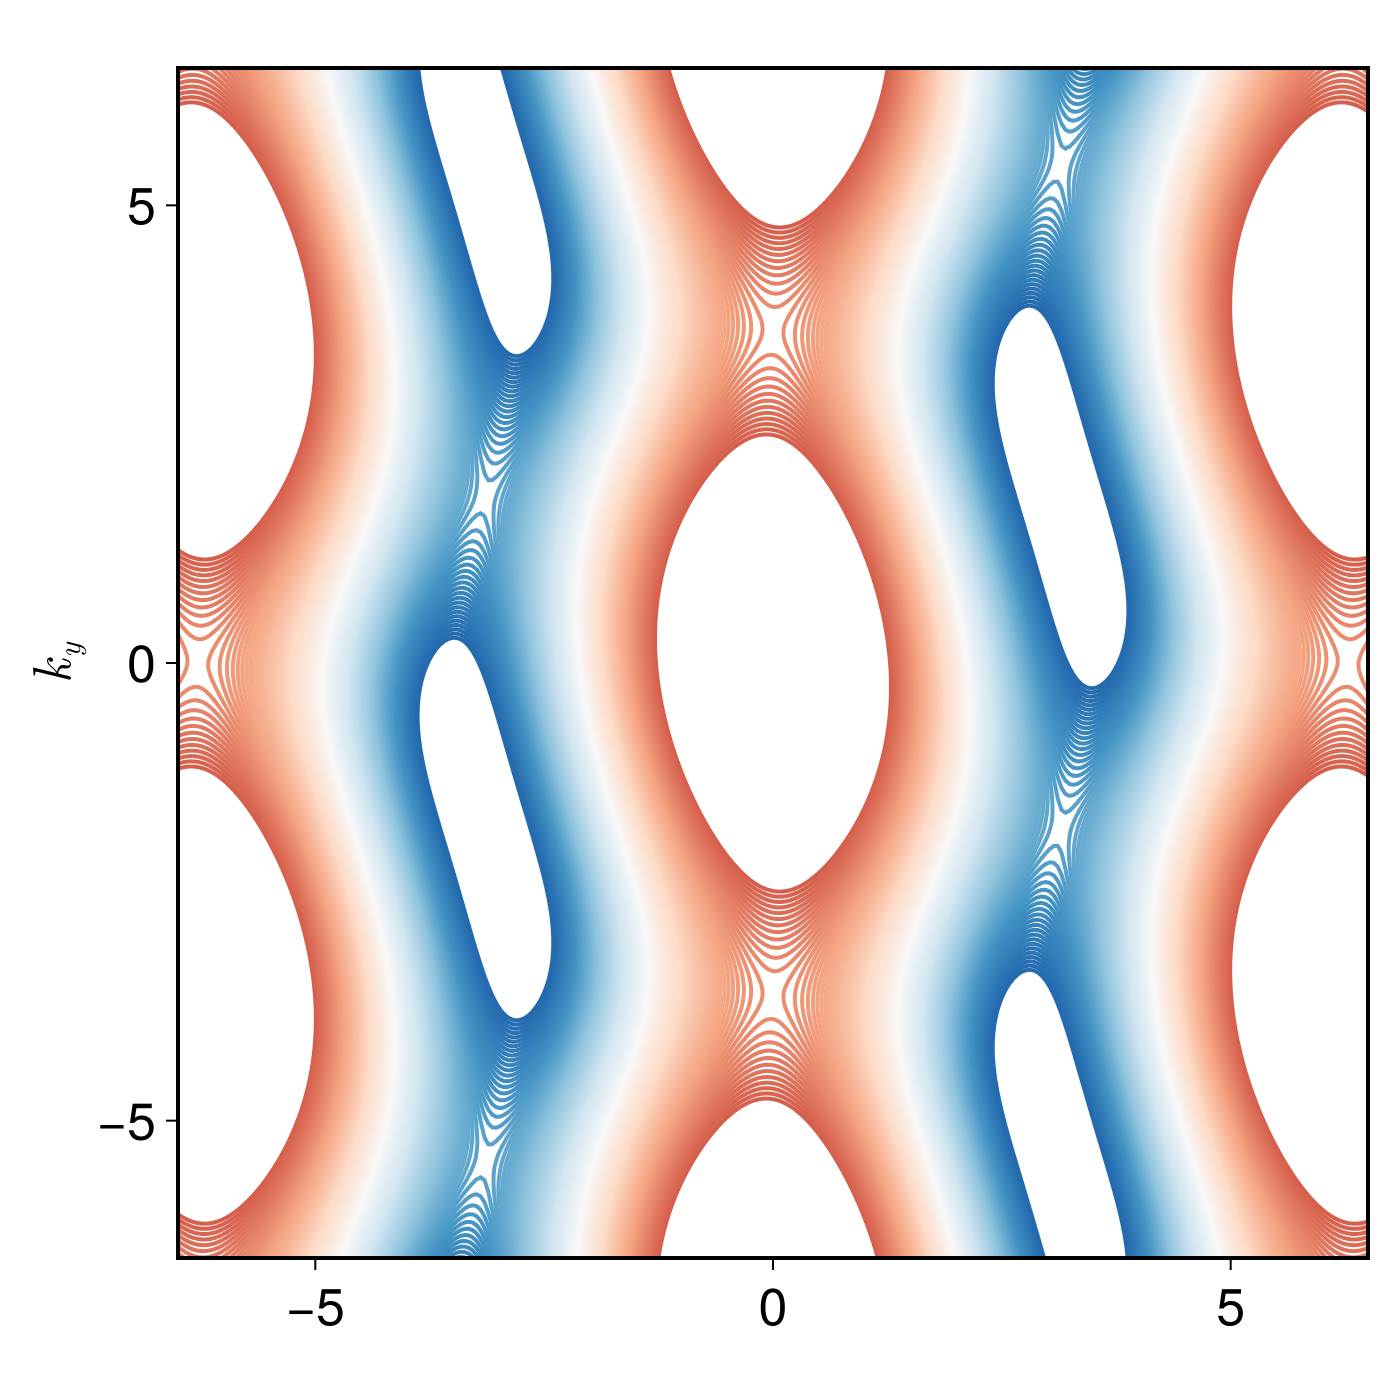

In [74]:
let λ::Float64 = 2.3, u1::Float64 = 2.0, u2::Float64 = 0.5, u3::Float64 = 1.0 
    band::Int64 = 1
    kmin::Float64 = -6.5
    kmax::Float64 = 6.5 
    nps::Int64   = 300
    min::Float64 = -10.0 
    max::Float64 = -4.0 
    

    kxs = LinRange(kmin, kmax, nps)
    kys = LinRange(kmin, kmax, nps)

    ks = Matrix{Vector{Float64}}(undef, nps, nps)
    for i ∈ 1 : nps
        for j ∈ 1 : nps
            ks[i, j] = [kxs[i], kys[j]]
        end
    end

    ks = cartesian_to_reduced.(ks, Ref(G))

    eks = EvalsHamiltoniankRashba_1.(ks, Ref(λ), Ref(u1), Ref(u2), Ref(u3))
    eks = [eks[i, j][band] for i ∈ 1:nps, j ∈ 1:nps]
    

    f = Figure(size = (700, 700))
    ax = Axis(f[1, 1],
        aspect = 1.0,
        ylabel = L"$k_y$",
        xlabel = L"$k_x$",
        yticklabelsize = 26.0,
        xticklabelsize = 26.0,
        ylabelsize = 26,
        xlabelsize = 26,
        spinewidth = 2,
        limits = (kxs[1], kxs[end], kys[1], kys[end]),
    )

    contour!(ax, kxs, kys, eks, levels = min:0.05:max, colormap = :RdBu, linewidth = 2)
    hideydecorations!(ax, grid = true, label = false, ticks = false, ticklabels = false)
    hidexdecorations!(ax, grid = true, ticks = false, ticklabels = false)
    #save("contours_phi_pi6.png", f)
    f
end


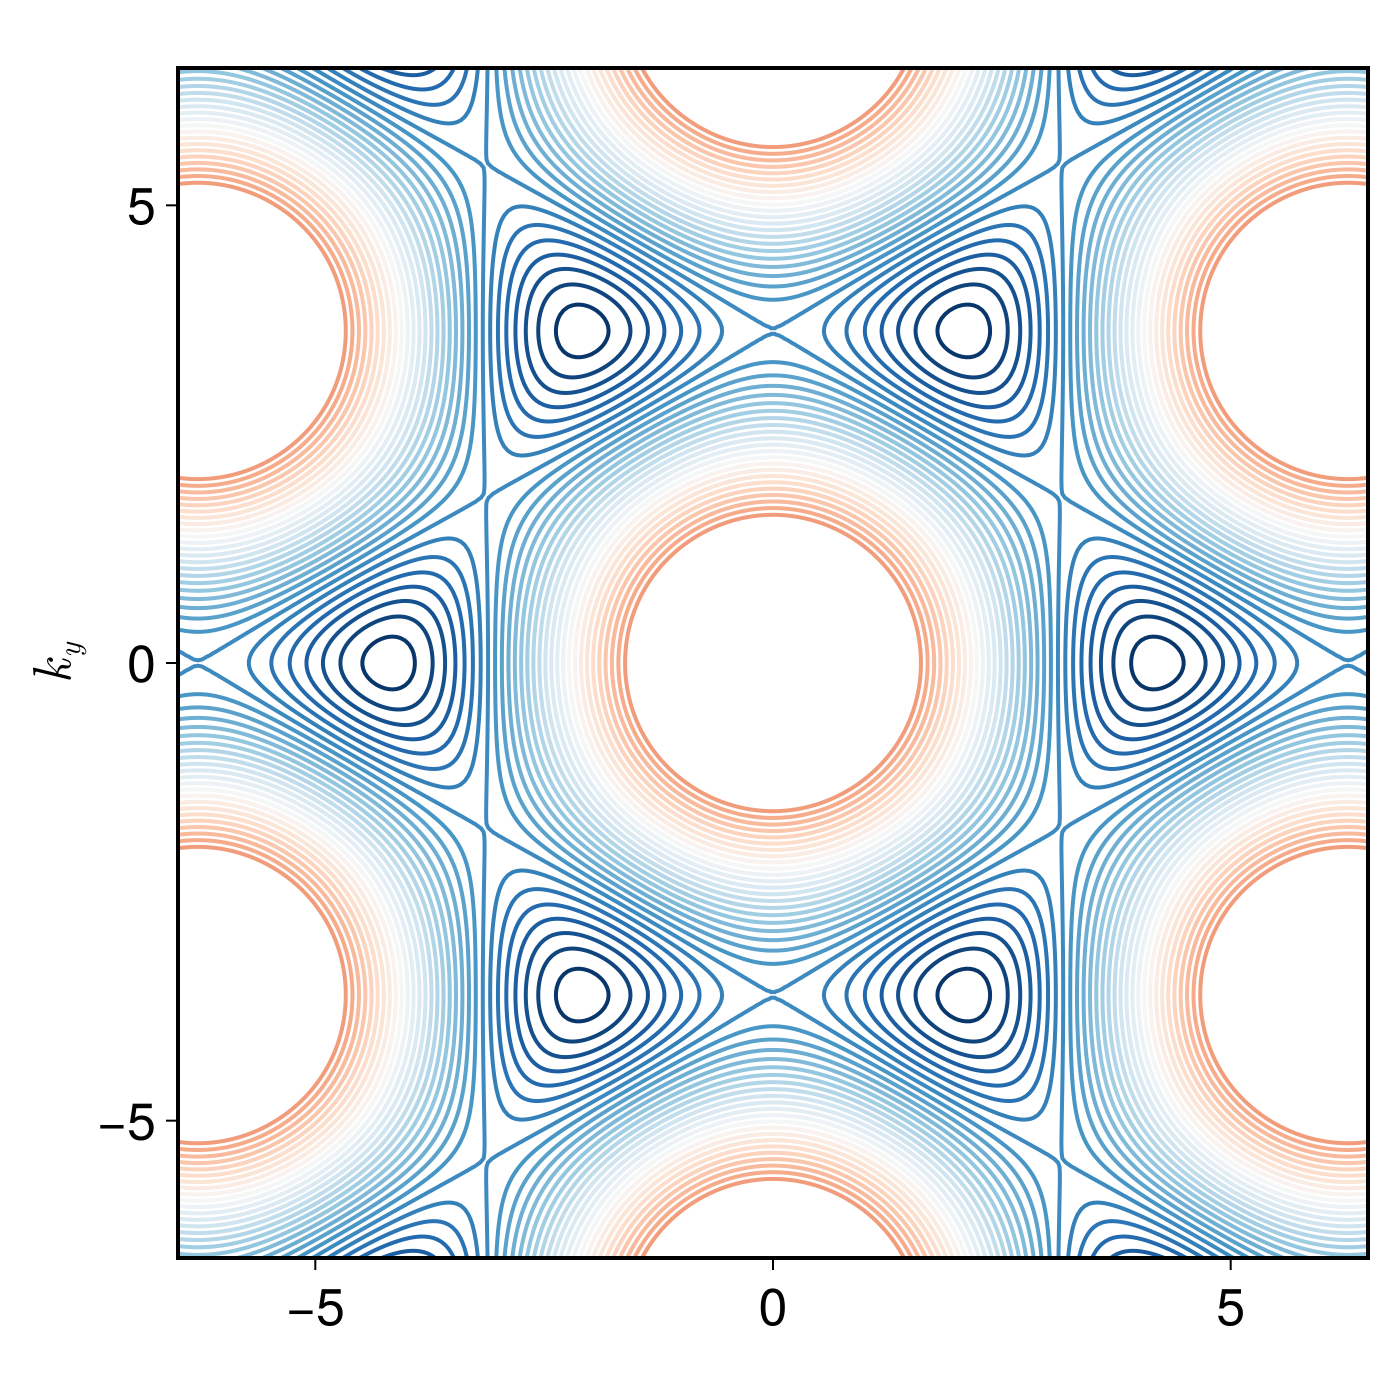

In [75]:
let λ::Float64 = 0.6, θ::Float64 = π / 2, ϕ::Float64 = π / 4.0, B = 0.3
    band::Int64 = 1
    kmin::Float64 = -6.5
    kmax::Float64 = 6.5 
    nps::Int64   = 300
    min::Float64 = -4.0 
    max::Float64 = 0.0 
    

    kxs = LinRange(kmin, kmax, nps)
    kys = LinRange(kmin, kmax, nps)

    ks = Matrix{Vector{Float64}}(undef, nps, nps)
    for i ∈ 1 : nps
        for j ∈ 1 : nps
            ks[i, j] = [kxs[i], kys[j]]
        end
    end

    ks = cartesian_to_reduced.(ks, Ref(G))

    eks = EvalsHamiltoniank_1.(ks, Ref(λ), Ref(θ), Ref(ϕ), Ref(B))
    eks = [eks[i, j][band] for i ∈ 1:nps, j ∈ 1:nps]
    

    f = Figure(size = (700, 700))
    ax = Axis(f[1, 1],
        aspect = 1.0,
        ylabel = L"$k_y$",
        xlabel = L"$k_x$",
        yticklabelsize = 26.0,
        xticklabelsize = 26.0,
        ylabelsize = 26,
        xlabelsize = 26,
        spinewidth = 2,
        limits = (kxs[1], kxs[end], kys[1], kys[end]),
    )

    contour!(ax, kxs, kys, eks, levels = min:0.05:max, colormap = :RdBu, linewidth = 2)
    hideydecorations!(ax, grid = true, label = false, ticks = false, ticklabels = false)
    hidexdecorations!(ax, grid = true, ticks = false, ticklabels = false)
    #save("contours_phi_pi6.png", f)
    f
end


Velocity Matrices 

In [88]:
using Symbolics 
@variables k1 k2 kx ky k kr 

k = [kx, ky]; kr = [k1, k2]
kr = inv(G)' * k 

println("k₁ = ", kr[1])
println("k₂ = ", kr[2])
println("k₃ = ", -kr[1] - kr[2])

Dk1_Dx = 0.15915 
Dk1_Dy = 0.0 
Dk2_Dx = -0.079577 
Dk2_Dy = 0.13783 



k₁ = 0.15915494309189535kx
k₂ = -0.07957747154594767kx + 0.137832223855448ky
k₃ = -0.07957747154594767kx - 0.137832223855448ky


0.13783

In [90]:
@inline function Vx_Rashba_2(k::Vector{Float64}, λI::Float64, λR::Float64, θ::Float64, ϕ::Float64, 
    d1::Vector{Float64} = d1, d2::Vector{Float64} = d2, d3::Vector{Float64} = d3)

    ck1::Float64 = -π * sin(π * k[1]) * 0.15915 
    ck2::Float64 = π * sin(π * k[2]) * 0.079577
    ck3::Float64 = π * sin(π * (-k[1] - k[2])) * 0.079577 

    # Magnetization Direction 
    m = [sin(θ) * cos(ϕ), sin(θ) * sin(ϕ), cos(θ)]
    m1 = dot(m, d1); m2 = dot(m, d2); m3 = dot(m, d3)
    σ1 = σy; σ2 = d2[1] * σx + d2[2] * σy; σ3 = d3[1] * σx + d3[2] * σy 

    H::SMatrix{6, 6, ComplexF64, 36} =  -2.0 * λR * (m1 * kron(σ1, ck1 * TI1) + m2 * kron(σ2, ck2 * TI2) + m3 * kron(σ3, ck3 * TI3)) +
                                (-2.0 * λI) * m[3] * kron(σz, ck1 * TI1 + ck2 * TI2 + ck3 * TI3) +  
                                (-2.0) * kron(σ0, ck1 * TR1 + ck2 * TR2 + ck3 * TR3)
    return eigvals(Hermitian(H + H'))
end


@inline function Vy_Rashba_2(k::Vector{Float64}, λI::Float64, λR::Float64, θ::Float64, ϕ::Float64, 
    d1::Vector{Float64} = d1, d2::Vector{Float64} = d2, d3::Vector{Float64} = d3)

    ck1::Float64 = 0.0
    ck2::Float64 = -π * sin(π * k[2]) * 0.1378322
    ck3::Float64 = π * sin(π * (-k[1] - k[2])) * 0.1378322

    # Magnetization Direction 
    m = [sin(θ) * cos(ϕ), sin(θ) * sin(ϕ), cos(θ)]
    m1 = dot(m, d1); m2 = dot(m, d2); m3 = dot(m, d3)
    σ1 = σy; σ2 = d2[1] * σx + d2[2] * σy; σ3 = d3[1] * σx + d3[2] * σy 

    H::SMatrix{6, 6, ComplexF64, 36} =  -2.0 * λR * (m1 * kron(σ1, ck1 * TI1) + m2 * kron(σ2, ck2 * TI2) + m3 * kron(σ3, ck3 * TI3)) +
                                (-2.0 * λI) * m[3] * kron(σz, ck1 * TI1 + ck2 * TI2 + ck3 * TI3) +  
                                (-2.0) * kron(σ0, ck1 * TR1 + ck2 * TR2 + ck3 * TR3)
    return eigvals(Hermitian(H + H'))
end



Vy_Rashba_2 (generic function with 4 methods)